<a href="https://colab.research.google.com/github/shwetabhosale15/shweta/blob/main/decision_tree_SVM_Random_forest_Navie_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **7 th project**

#**decision tree** -

 classifiaction model

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset=pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [ ]:
dataset.drop(['User ID','Gender'],axis=1,inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(dataset.drop('Purchased',axis=1))

StandardScaler()

In [ ]:
scaler_features=scaler.transform(dataset.drop('Purchased',axis=1))

In [ ]:
scaler_features

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [ ]:
df=pd.DataFrame(scaler_features,columns=['Age','EnstimatedSalary'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df,dataset['Purchased'],test_size=0.30,random_state=101)

In [ ]:
x_train.shape

(280, 2)

In [ ]:
x_test.shape

(120, 2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTC=DecisionTreeClassifier()

In [ ]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred=DTC.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

[[70 10]
 [ 5 35]]


In [ ]:
70+35/120*100

99.16666666666667

# ** support vector machine  SVM**

**social_network data used for this model...upto train_test_split step are same ..before that below step run**

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier=SVC()

In [ ]:
classifier.fit(x_train,y_train)

SVC()

In [ ]:
pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
acc=accuracy_score(y_test,pred)

In [ ]:
acc

0.9333333333333333

In [ ]:
acc*100

93.33333333333333

In [ ]:
print(confusion_matrix(y_test,pred))

[[73  7]
 [ 1 39]]


In [ ]:
(73+39)/120*100

93.33333333333333

#**Random** **forest**

**social_network data used for this model...upto train_test_split step are same ..before that below step run**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=28)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=28)

In [ ]:
rfc.pred=rfc.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,rfc.pred))

[[73  7]
 [ 3 37]]


In [ ]:
(73+37)/120*100

91.66666666666666

**elbow** **method**

In [ ]:
err_rate=[]

In [ ]:
for i in range(1,100):
  rfc=RandomForestClassifier(n_estimators=i)
  rfc.fit(x_train,y_train)
  rfc.pred=rfc.predict(x_test)
  err_rate.append(np.mean(rfc.pred !=y_test))

In [ ]:
err_rate

[0.14166666666666666,
 0.13333333333333333,
 0.09166666666666666,
 0.1,
 0.1,
 0.1,
 0.09166666666666666,
 0.09166666666666666,
 0.10833333333333334,
 0.10833333333333334,
 0.1,
 0.10833333333333334,
 0.08333333333333333,
 0.09166666666666666,
 0.08333333333333333,
 0.1,
 0.1,
 0.08333333333333333,
 0.075,
 0.10833333333333334,
 0.1,
 0.09166666666666666,
 0.09166666666666666,
 0.075,
 0.09166666666666666,
 0.10833333333333334,
 0.09166666666666666,
 0.06666666666666667,
 0.09166666666666666,
 0.09166666666666666,
 0.1,
 0.10833333333333334,
 0.09166666666666666,
 0.1,
 0.1,
 0.1,
 0.1,
 0.10833333333333334,
 0.1,
 0.08333333333333333,
 0.08333333333333333,
 0.09166666666666666,
 0.08333333333333333,
 0.1,
 0.09166666666666666,
 0.08333333333333333,
 0.10833333333333334,
 0.08333333333333333,
 0.075,
 0.08333333333333333,
 0.09166666666666666,
 0.1,
 0.1,
 0.1,
 0.1,
 0.08333333333333333,
 0.08333333333333333,
 0.1,
 0.075,
 0.06666666666666667,
 0.09166666666666666,
 0.1,
 0.1,
 0.091

Text(0, 0.5, 'err_rate')

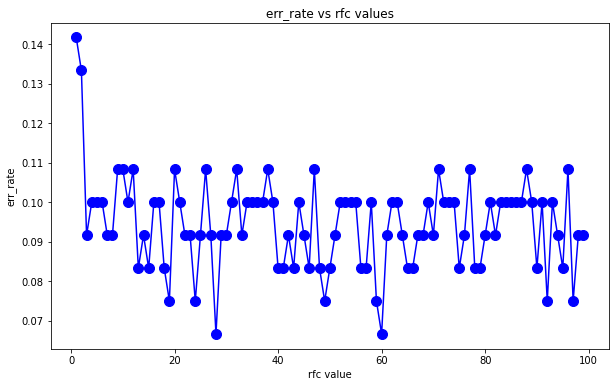

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),err_rate,color='b',marker='o',markersize=10)
plt.title('err_rate vs rfc values')
plt.xlabel('rfc value')
plt.ylabel('err_rate')

# **Naive** **Bayes**

**social_network data used for this model...upto train_test_split step are same ..before that below step run**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
GNB=GaussianNB()

In [ ]:
GNB.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=GNB.predict(x_test)

In [ ]:
acc=accuracy_score(y_test,y_pred)

In [ ]:
acc

0.9083333333333333

In [ ]:
acc*100

90.83333333333333